In [10]:
from voc_data_loader import image_loader, voc_meta
%matplotlib inline

import matplotlib
import numpy
import matplotlib.pyplot as plt

In [3]:
loader = image_loader("./")
meta = voc_meta("./")

In [6]:
batch_size = 1
data, labels, boxes = loader.get_next_train_batch(batch_size)
# data, labels, boxes = loader.get_next_train_batch(batch_size, mode='class')

This is the data image shape

In [7]:
print data.shape

(1, 512, 512, 3)


Here is what the bounding boxes look like

In [18]:
print boxes

[[[  29.  111.  500.  405.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]]

 [[  47.  348.  390.  452.]
  [ 410.  424.  432.  470.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]]

 [[  31.  120.  432.  395.]
  [ 214.  106.  334.  303.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]]

 [[ 216.  119.  426.  279.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.    0.    0.]
  [   0.    0.

And lastly, here are the labels (some-hot format):

In [11]:
print labels
print labels.shape
print numpy.mean(numpy.sum(labels, axis=1))

[[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
    0.  0.]]]
(1, 10, 20)
0.05


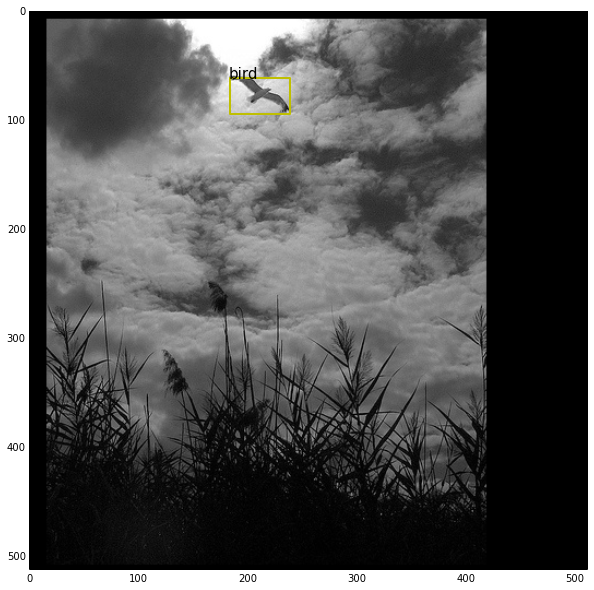

In [9]:
for i in range(batch_size):
    n_roi = int(numpy.sum(labels[i]))
    fig,ax = plt.subplots(figsize=(10,10))
    plt.imshow(data[i])
    for box, label in zip(boxes[i, 0:n_roi], labels[i, 0:n_roi]):
        class_name = meta.class_name(numpy.argmax(label))
        rect = matplotlib.patches.Rectangle((box[0],box[1]),
                                            box[2] - box[0],
                                            box[3] - box[1],
                                            linewidth=2,
                                            edgecolor='y',
                                            facecolor='none')
        ax.text(box[0], box[1],class_name, fontsize=15)
        ax.add_patch(rect)
    plt.show()
